In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister


In [5]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
# circuit.h(q[0])
# circuit.cx(q[0], q[1])


In [9]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

In [20]:
circuit.h(q[0])
circuit.cx(q[0], q[1])


In [21]:
circuit.measure(q[0], c[0])

In [22]:
circuit.draw()

┌─┐   ┌─┐┌───┐     ┌─┐
q1_0: ┤M├───┤M├┤ H ├──■──┤M├
      └╥┘┌─┐└╥┘└───┘┌─┴─┐└╥┘
q1_1: ─╫─┤M├─╫──────┤ X ├─╫─
       ║ └╥┘ ║      └───┘ ║ 
c1: 2/═╩══╩══╩════════════╩═
       0  1  0            0

In [19]:
from qiskit import Aer
from qiskit import execute

In [24]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=100)

In [29]:
job.result().get_counts(circuit)

{'01': 50, '00': 50}

In [31]:
from qiskit.quantum_info import Pauli
import numpy as np

In [44]:
circuit.u(np.pi/2,np.pi/4, np.pi/3,  qubit=q[0])

In [45]:
circuit.draw()

┌─┐   ┌─┐┌───┐     ┌─┐┌──────────────┐┌────────────────┐
q1_0: ┤M├───┤M├┤ H ├──■──┤M├┤ U(π/2,π/4,0) ├┤ U(π/2,π/4,π/3) ├
      └╥┘┌─┐└╥┘└───┘┌─┴─┐└╥┘└──────────────┘└────────────────┘
q1_1: ─╫─┤M├─╫──────┤ X ├─╫───────────────────────────────────
       ║ └╥┘ ║      └───┘ ║                                   
c1: 2/═╩══╩══╩════════════╩═══════════════════════════════════
       0  1  0            0

In [48]:
from qiskit.circuit import Parameter, ParameterVector
from itertools import cycle

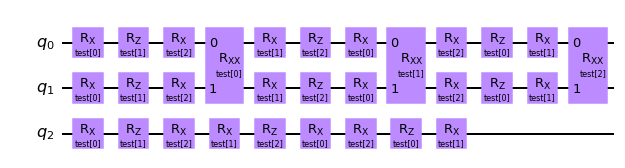

In [49]:
n_qubits = 3
n_layers = 3

paramsvec = ParameterVector("test", n_layers)
pv_iterator = cycle(paramsvec)

circ = QuantumCircuit(n_qubits)

for layer in range(n_layers):
        for i in range(n_qubits):
            circ.rx(next(pv_iterator), i)
            circ.rz(next(pv_iterator), i)
            circ.rx(next(pv_iterator), i)
        for i in range(0, n_qubits - 1, 2):
            circ.rxx(next(pv_iterator), i, i+1)
circ.draw('mpl')

In [55]:
circ.assign_parameters(np.random.uniform(0, np.pi, len(circ.parameters)))

In [56]:
circ.draw()

┌─────────────┐┌─────────────┐┌─────────────┐┌───────────────┐»
q_0: ┤ Rx(test[0]) ├┤ Rz(test[1]) ├┤ Rx(test[2]) ├┤0              ├»
     ├─────────────┤├─────────────┤├─────────────┤│  Rxx(test[0]) │»
q_1: ┤ Rx(test[0]) ├┤ Rz(test[1]) ├┤ Rx(test[2]) ├┤1              ├»
     ├─────────────┤├─────────────┤├─────────────┤└┬─────────────┬┘»
q_2: ┤ Rx(test[0]) ├┤ Rz(test[1]) ├┤ Rx(test[2]) ├─┤ Rx(test[1]) ├─»
     └─────────────┘└─────────────┘└─────────────┘ └─────────────┘ »
«     ┌─────────────┐┌─────────────┐┌─────────────┐┌───────────────┐»
«q_0: ┤ Rx(test[1]) ├┤ Rz(test[2]) ├┤ Rx(test[0]) ├┤0              ├»
«     ├─────────────┤├─────────────┤├─────────────┤│  Rxx(test[1]) │»
«q_1: ┤ Rx(test[1]) ├┤ Rz(test[2]) ├┤ Rx(test[0]) ├┤1              ├»
«     ├─────────────┤├─────────────┤├─────────────┤└┬─────────────┬┘»
«q_2: ┤ Rz(test[2]) ├┤ Rx(test[0]) ├┤ Rx(test[2]) ├─┤ Rz(test[0]) ├─»
«     └─────────────┘└─────────────┘└─────────────┘ └─────────────┘ »
«     ┌─────────────┐┌─────────────┐┌─────────────┐┌───────────────┐
«q_0: ┤ Rx(test[2]) ├┤ Rz(test[0]) ├┤ Rx(test[1]) ├┤0              ├
«     ├─────────────┤├─────────────┤├─────────────┤│  Rxx(test[2]) │
«q_1: ┤ Rx(test[2]) ├┤ Rz(test[0]) ├┤ Rx(test[1]) ├┤1              ├
«     ├─────────────┤└─────────────┘└─────────────┘└───────────────┘
«q_2: ┤ Rx(test[1]) ├───────────────────────────────────────────────
«     └─────────────┘

: 